In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numba import njit, prange
from scipy.sparse import csc_matrix, linalg as sla

/home/IPP-HGW/patricks/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
s0 = 3
h0 = 1
w = 1
R1 = 1
R2 = 5

s = np.linspace(R1, R2, 101)
ds = (np.max(s)-np.min(s))/(len(s)-1)
h = h0*np.exp(-(s-s0)**2/w)
dh_ds = -h0*((2*(s-s0))/w)*np.exp(-(s-s0)**2/w)
sigma_1 = 1/((s+1j*h)*(1+1j*dh_ds))
sigma_2 = (s+1j*h)/(1+1j*dh_ds)
phi = np.zeros(len(s))


In [3]:
print(ds, s[1]-s[0])

0.04 0.040000000000000036


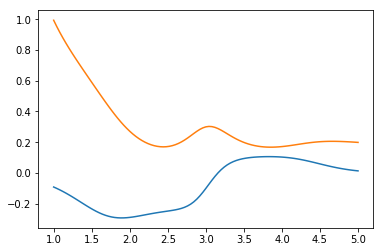

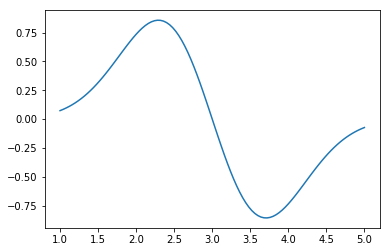

In [4]:
plt.plot(s, np.imag(sigma_1))
plt.plot(s, np.real(sigma_1))
plt.show()
plt.plot(s, dh_ds)
plt.show()

In [76]:
@njit
def M(s, ds, sigma_1, sigma_2):
    col = np.zeros(3*len(s)-4)
    row = np.zeros(3*len(s)-4)
    data = np.zeros(3*len(s)-4)
    data[0] = 1
    for i in prange(1, len(s)-1):
        row[3*i-2:3*i+1] = i
        col[3*i-2] = i-1
        col[3*i-1] = i
        col[3*i] = i+1
        data[3*i-2] = (s[i]-ds/2)/(ds**2*s[i])
        data[3*i-1] = -2/ds**2
        data[3*i] = (s[i]+ds/2)/(ds**2*s[i])
    col[-1] = len(s)-1
    row[-1] = len(s)-1
    data[-1] = 1
    return data, col, row

In [77]:
data, col, row = M(s, ds, sigma_1, sigma_2)
A = csc_matrix((data, (row, col)), shape=(len(s), len(s)))
#del data, col, row 
lu = sla.splu(A)

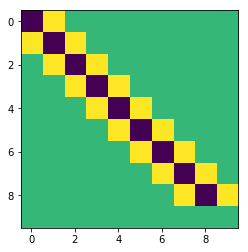

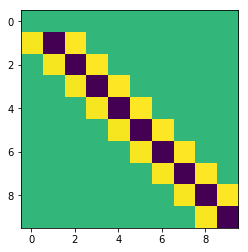

1.0 1.0
-1250.0 637.0192307692307


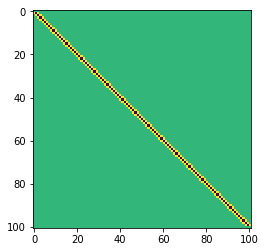

In [78]:
A_array = A.toarray()
plt.imshow(A_array[-10:, -10:])
plt.show()

plt.imshow(A_array[:10, :10])
plt.show()

In [79]:
f = np.zeros(len(s))
f[0] = 100
f[-1] = 0
phi = lu.solve(f)

-62.13349345596119 100.0


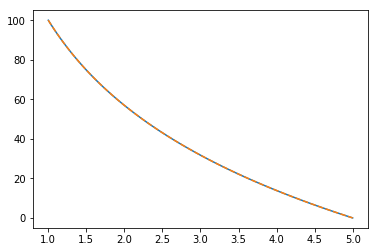

In [83]:
c1 = (-100/np.log(R2))*(1/(1+np.log(R1)/np.log(R2)))
c2 = -np.log(R2)*c1
print(c1, c2)
phi_ana = c1*np.log(s) + c2
plt.plot(s, phi)
plt.plot(s, phi_ana, linestyle="dashed")
plt.show()